# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [50]:
# Import your librarie
import pandas as pd
import sklearn


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [51]:
from sklearn.datasets import load_diabetes
import pandas as pandas
diabetes=load_diabetes()
df_features=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y=pd.DataFrame(diabetes.target)


Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [52]:
#  Your code here:
feat=df_features.keys()
feat



Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [53]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [54]:
df_y=pd.DataFrame(diabetes.target)
df=df_features
df['Target']=df_y

In [55]:
df.sample

<bound method NDFrame.sample of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [56]:
# Your code here:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:

- edad edad en años
- sexo
- bmi índice de masa corporal
- pb presión arterial media
- s1 tc, células T (un tipo de glóbulos blancos)
- s2 ldl, lipoproteínas de baja densidad
- s3 hdl, lipoproteínas de alta densidad
- s4 tch, hormona estimulante del tiroides
- s5 ltg, lamotrigina
- s6 glu, nivel de azúcar en sangre




Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [57]:
df.shape


(442, 11)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [58]:
from sklearn.linear_model import LinearRegression


Initialize the model in the variable `diabetes_model`

In [59]:
diabetes_model=LinearRegression()

X_model=df
y_model=diabetes.target

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [60]:
diabetes_model.fit(X_model,y_model)
diabetes_model.intercept_


-1.4210854715202004e-13

In [61]:
diabetes_model.coef_

array([ 1.18302276e-13, -8.32223179e-13, -4.85407938e-13, -2.73693611e-13,
        9.16409310e-13, -6.39086657e-13, -2.58024559e-13, -1.10704956e-13,
       -6.40510540e-13, -1.01751507e-13,  1.00000000e+00])

In [62]:
import statsmodels.formula.api as smf



# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [63]:
diabetes_model=smf.ols("Target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6", data=X_model).fit()

diabetes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.83e-62
Time:                        18:00:28   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [64]:

auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [65]:
auto.head(5)



,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [66]:
auto.dtypes


mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

In [67]:
modelos=auto['car_name'].unique()
dum=pd.get_dummies(auto[['car_name']], drop_first=True)
dum.head(5)

,"car_name_\t""amc ambassador dpl""","car_name_\t""amc ambassador sst""","car_name_\t""amc concord d/l""","car_name_\t""amc concord dl 6""","car_name_\t""amc concord dl""","car_name_\t""amc concord""","car_name_\t""amc gremlin""","car_name_\t""amc hornet sportabout (sw)""","car_name_\t""amc hornet""","car_name_\t""amc matador (sw)""",...,"car_name_\t""volvo 145e (sw)""","car_name_\t""volvo 244dl""","car_name_\t""volvo 245""","car_name_\t""volvo 264gl""","car_name_\t""volvo diesel""","car_name_\t""vw dasher (diesel)""","car_name_\t""vw pickup""","car_name_\t""vw rabbit c (diesel)""","car_name_\t""vw rabbit custom""","car_name_\t""vw rabbit"""
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_dumm= pd.concat([auto.drop(['car_name'], axis = 1), dum], axis=1)


In [70]:
df_dumm

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,"car_name_\t""amc ambassador dpl""","car_name_\t""amc ambassador sst""","car_name_\t""amc concord d/l""",...,"car_name_\t""volvo 145e (sw)""","car_name_\t""volvo 244dl""","car_name_\t""volvo 245""","car_name_\t""volvo 264gl""","car_name_\t""volvo diesel""","car_name_\t""vw dasher (diesel)""","car_name_\t""vw pickup""","car_name_\t""vw rabbit c (diesel)""","car_name_\t""vw rabbit custom""","car_name_\t""vw rabbit"""
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the newest model year and the oldest model year?

Int64Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype='int64', name='model_year')

In [ ]:
by_year=df_dumm.groupby('model_year').sum()
by_year.index



Check the dataset for missing values and remove all rows containing at least one missing value.

In [72]:
newst=by_year.index.min()


In [73]:
fila=by_year[by_year.index==newst]
fila

,mpg,cylinders,displacement,horse_power,weight,acceleration,"car_name_\t""amc ambassador dpl""","car_name_\t""amc ambassador sst""","car_name_\t""amc concord d/l""","car_name_\t""amc concord dl 6""",...,"car_name_\t""volvo 145e (sw)""","car_name_\t""volvo 244dl""","car_name_\t""volvo 245""","car_name_\t""volvo 264gl""","car_name_\t""volvo diesel""","car_name_\t""vw dasher (diesel)""","car_name_\t""vw pickup""","car_name_\t""vw rabbit c (diesel)""","car_name_\t""vw rabbit custom""","car_name_\t""vw rabbit"""
model_year,,,,,,,,,,,,,,,,,,,,,
70,513.0,196,8161.0,4287.0,97811,375.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [93]:
df.dropna(how='any', inplace=True)


In [94]:
len(df[['cylinders']].value_counts())

5

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

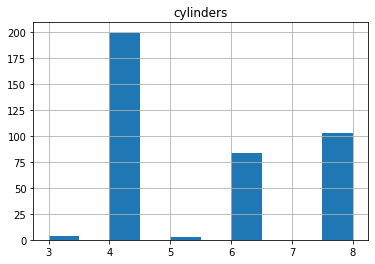

In [95]:
#lo hartía así
df[['cylinders']].hist()

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [109]:
df=auto.drop(['car_name'], axis = 1)
df.dropna(how='any', inplace=True)
df.isna().sum()


mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X=df.drop(['mpg'], axis=1)
y=df['mpg']
X_train, X_test, y_train, y_true =train_test_split(X,y, test_size=0.2)


In [111]:
X_train.shape

(313, 6)

In [112]:
X_test.shape

(79, 6)

In [113]:
y_train.shape

(313,)

In [114]:
y_true.shape

(79,)

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [115]:
lr=LinearRegression()



LinearRegression()

Next, fit the model in the cell below.

In [116]:
lr.fit(X_train,y_train)



LinearRegression()

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [117]:
y_pred=lr.predict(X_test)


In [118]:
from sklearn.metrics import r2_score

r2_score(y_true,y_pred)

0.8236077719373456

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [121]:
y_test=lr.predict(X_test)

r2_score(y_true,y_test)

0.8236077719373456

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [136]:
X=df.drop(['mpg'], axis=1)
y=df['mpg']
X_train, X_test, y_train, y_true =train_test_split(X,y, test_size=0.1)



In [139]:
y_true.shape

(40,)

In [140]:
y_train.shape

(352,)

In [141]:
X_test.shape

(40, 6)

In [142]:
X_train.shape

(352, 6)

Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [147]:
auto_model09=LinearRegression()
auto_model09.fit(X_train,y_train)


LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [150]:
y_pred=auto_model09.predict(X_test)



0.7405069578893754

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [151]:
r2_score(y_true,y_pred)


0.7405069578893754

#Vemos que el valor r2 disminuye, por lo tanto parece que este esimador de la bondad dice que es un mejor modelo ahora, con más datos de train

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [152]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [155]:
lr_improved=RFE(lr,n_features_to_select=3)


Fit the model and print the ranking

In [157]:
lr_improved.fit(X_train,y_train)

lr_improved.ranking_

array([1, 2, 4, 3, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [160]:
X=df.drop(['mpg'], axis=1)
y=df[['cylinders','displacement','horse_power']]
X_train, X_test, y_train, y_true =train_test_split(X,y, test_size=0.2)




Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [163]:
auto_model_reduced=LinearRegression()
auto_model_reduced.fit(X_train,y_train)
y_pred=auto_model_reduced.predict(X_test)

r2_score(y_true,y_pred)


1.0

#Parece que no ha mejorado, más bien ha empeorado ya que ha aumentado el error.M